In [58]:
import requests
import json
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


# B. Khám phá dữ liệu

## 1. Đọc dữ liệu, tính số dòng và số cột

Đọc dữ liệu từ file `weather-2021.csv` và in ra 5 dòng đầu tiên

In [59]:
df = pd.read_csv('weather-2021.csv')
df.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,VVTS,observation,1609441200,VVTS,Ho Chi Minh City,1609434000,N,75,29,2900,Partly Cloudy,NaN,NaN,61.0,75.0,61.0,29.85,6.0,75,30.0,NNE,NaN,8,NaN,NaN,NaN,NaN,NaN,Low,75.0,0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VVTS,observation,1609443000,VVTS,Ho Chi Minh City,1609435800,N,75,29,2900,Partly Cloudy,NaN,NaN,61.0,75.0,61.0,29.85,6.0,75,30.0,NNE,NaN,7,NaN,NaN,NaN,NaN,NaN,Low,75.0,0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VVTS,observation,1609444800,VVTS,Ho Chi Minh City,1609437600,N,75,29,2900,Partly Cloudy,NaN,NaN,61.0,75.0,61.0,29.82,6.0,75,40.0,NE,NaN,7,NaN,NaN,NaN,NaN,NaN,Low,75.0,0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VVTS,observation,1609446600,VVTS,Ho Chi Minh City,1609439400,N,73,29,2900,Partly Cloudy,NaN,NaN,61.0,73.0,65.0,29.82,4.0,73,40.0,NE,NaN,6,NaN,NaN,NaN,NaN,NaN,Low,73.0,0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VVTS,observation,1609448400,VVTS,Ho Chi Minh City,1609441200,N,73,29,2900,Partly Cloudy,NaN,NaN,61.0,73.0,65.0,29.82,4.0,73,20.0,NNE,NaN,6,NaN,NaN,NaN,NaN,NaN,Low,73.0,0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tính số dòng, số cột và lưu vào 2 biến `num_rows` và `num_cols`

In [60]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 17390
Number of columns: 45


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu là thông tin và các chỉ số về thời tiết của quận Tân Bình (TP.HCM) tại thời điểm nhất định (cập nhật 30 phút/lần). Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức không có dòng nào bị 'lạc loài'

## 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp

In [61]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp lặp 

## 4. Tỉ lệ giá trị thiếu của từng cột

Ta tính tỉ lệ giá trị thiếu của từng cột. Đầu tiên ta dùng `isnull()` để biết được các giá trị thiếu, sau đó dùng `sum()` để tính tổng số giá trị thiếu theo từng cột. Cuối cùng ta chia cho tổng số dòng để tính tỉ lệ giá trị thiếu của mỗi cột và lưu kết quả vào biến `missing_ratio`

In [62]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

key                          0.000000
class                        0.000000
expire_time_gmt              0.000000
obs_id                       0.000000
obs_name                     0.000000
valid_time_gmt               0.000000
day_ind                      0.000000
temp                         0.000000
wx_icon                      0.000000
icon_extd                    0.000000
wx_phrase                    0.000000
pressure_tend                1.000000
pressure_desc                1.000000
dewPt                        0.000115
heat_index                   0.000115
rh                           0.000115
pressure                     0.000575
vis                          0.000000
wc                           0.000000
wdir                         0.255952
wdir_cardinal                0.000000
gust                         0.994767
wspd                         0.000000
max_temp                     1.000000
min_temp                     1.000000
precip_total                 1.000000
precip_hrly 

Có thể thấy, có những cột mà tỉ lệ giá trị thiếu lên đến hơn 99% hoặc thậm chí là 100%

### Loại bỏ một số cột không cần thiết

Ta có thể thấy có rất nhiều cột không có giá trị (hay tỉ lệ dữ liệu bị thiếu là 100%). Để làm gọn dữ liệu và để dễ quản lý dataframe hơn, ta sẽ bỏ đi những cột không có ý nghĩa đó

In [63]:
del_cols = []
for i in range(len(missing_ratio)):
    if missing_ratio[i] > 0.9:
        del_cols.append(missing_ratio.index[i])
df = df.drop(del_cols,axis=1)
df.columns

Index(['key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name',
       'valid_time_gmt', 'day_ind', 'temp', 'wx_icon', 'icon_extd',
       'wx_phrase', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wc',
       'wdir', 'wdir_cardinal', 'wspd', 'uv_desc', 'feels_like', 'uv_index',
       'clds'],
      dtype='object')

## 5. Mỗi cột có ý nghĩa gì?

Dựa trên thông tin tập dữ liệu đã mô tả ở phần Thu thập dữ liệu, ta chọn ra những cột liên quan và cần thiết:
- Thời điểm biểu diễn các chỉ số thời tiết: 'valid_time_gmt'
- Thông tin về chỉ số thời tiết: 'temp', 'wx_phrase', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wspd', 'uv_desc', 'feels_like', 'uv_index'

Như vậy các cột bị loại bỏ bao gồm: 'key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name', 'day_ind', 'wx_icon', 'icon_extd', 'wc', 'wdir', 'wdir_cardinal', 'clds'

### Loại bỏ một số cột không cần thiết

In [64]:
del_cols = ['key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name', 'day_ind', 'wx_icon', 'icon_extd', 'wc', 'wdir', 'wdir_cardinal', 'clds']
df = df.drop(del_cols, axis=1)
df.columns

Index(['valid_time_gmt', 'temp', 'wx_phrase', 'dewPt', 'heat_index', 'rh',
       'pressure', 'vis', 'wspd', 'uv_desc', 'feels_like', 'uv_index'],
      dtype='object')

Để dễ dàng ghi nhớ ý nghĩa của từng cột, ta tiến hành thay đổi tên cột bằng phương thức `rename()`

In [65]:
df.rename(columns = {'valid_time_gmt':'Time',
                     'temp':'Temperature',
                     'wx_phrase':'Condition',
                     'dewPt':'Dew Point',
                     'heat_index':'Heat Index',
                     'rh':'Humidity',
                     'pressure':'Pressure',
                     'vis':'Wind Force',
                     'wspd':'Wind Speed',
                     'uv_desc':'UV Description',
                     'feels_like':'Temperature Feels Like',
                     'uv_index':'UV Index'}, inplace = True)
# Sắp xếp lại thứ tự các cột
df = df[['Time',
         'Temperature', 'Heat Index', 'Temperature Feels Like',
         'Dew Point', 'Humidity',
         'Wind Force', 'Wind Speed',
         'Pressure',
         'UV Description', 'UV Index',
         'Condition',]]
df.columns

Index(['Time', 'Temperature', 'Heat Index', 'Temperature Feels Like',
       'Dew Point', 'Humidity', 'Wind Force', 'Wind Speed', 'Pressure',
       'UV Description', 'UV Index', 'Condition'],
      dtype='object')

## ?. Thống kê mô tả của từng cột

Tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()`

In [66]:
df.describe()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index
count,1.739000e+04,17390.000000,17388.000000,17388.000000,17388.000000,17388.000000,17390.000000,17390.000000,17380.000000,17390.000000
mean,1.625183e+09,82.682691,88.648781,88.648781,74.017483,77.013055,5.458048,5.906095,29.760186,1.991777
std,9.068949e+06,5.317355,8.770057,8.770057,4.949708,16.298229,1.002710,3.696052,0.069068,3.048441
min,1.609434e+09,64.000000,64.000000,64.000000,46.000000,21.000000,0.370000,0.000000,29.520000,0.000000
25%,1.617342e+09,79.000000,82.000000,82.000000,72.000000,66.000000,6.000000,3.000000,29.700000,0.000000
50%,1.625194e+09,82.000000,88.000000,88.000000,75.000000,79.000000,6.000000,6.000000,29.760000,0.000000
75%,1.633030e+09,86.000000,95.000000,95.000000,77.000000,89.000000,6.000000,8.000000,29.820000,4.000000
max,1.640882e+09,99.000000,114.000000,114.000000,84.000000,100.000000,6.000000,31.000000,29.970000,15.000000


## 6. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17390 entries, 0 to 17389
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    17390 non-null  int64  
 1   Temperature             17390 non-null  int64  
 2   Heat Index              17388 non-null  float64
 3   Temperature Feels Like  17388 non-null  float64
 4   Dew Point               17388 non-null  float64
 5   Humidity                17388 non-null  float64
 6   Wind Force              17390 non-null  float64
 7   Wind Speed              17390 non-null  int64  
 8   Pressure                17380 non-null  float64
 9   UV Description          17390 non-null  object 
 10  UV Index                17390 non-null  int64  
 11  Condition               17390 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.6+ MB


In [68]:
pd.set_option('display.max_columns', None)
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,1609434000,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Partly Cloudy
1,1609435800,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Partly Cloudy
2,1609437600,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Partly Cloudy
3,1609439400,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy
4,1609441200,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Partly Cloudy


Ta có thể thấy, cột `Time` nên là dữ liệu datetime, nhưng hiện giờ đang có kiểu dữ liệu numeric

Ta nên đưa giá trị 2 cột này về dạng datetime để có thể nhìn nhận và khám phá dễ hơn

In [69]:
def convert_time_column_to_datetime_type(df):
    if df['Time'].dtypes == 'int64':
        df['Time']= df['Time'].apply(datetime.fromtimestamp)
    return df


In [70]:
df = convert_time_column_to_datetime_type(df)

## ?. Xem xét tập giá trị của các thuộc tính phân loại

Xem xét mỗi thuộc tính phân loại có bao nhiêu giá trị phân biệt bằng phương thức `set()`

In [71]:
set(df['UV Description'].to_list())

{'Extreme', 'High', 'Low', 'Moderate', 'Very High'}

In [72]:
len(set(df['UV Description'].to_list()))

5

In [73]:
set(df['Condition'].to_list())

{'Cloudy',
 'Fair',
 'Fog',
 'Haze',
 'Heavy Rain Shower',
 'Heavy Rain Shower / Windy',
 'Heavy T-Storm',
 'Heavy T-Storm / Windy',
 'Light Rain',
 'Light Rain Shower',
 'Light Rain Shower / Windy',
 'Light Rain with Thunder',
 'Mostly Cloudy',
 'Mostly Cloudy / Windy',
 'Partly Cloudy',
 'Partly Cloudy / Windy',
 'Rain',
 'Rain Shower',
 'Rain Shower / Windy',
 'Showers in the Vicinity',
 'T-Storm',
 'T-Storm / Windy',
 'Thunder',
 'Thunder in the Vicinity'}

In [74]:
len(set(df['Condition'].to_list()))

24

Nhận xét:
- Có nhiều loại điều kiện thời tiết được liệt kê (24 loại)
- Xuất hiện nhiều loại có thể xếp chung vào một nhóm

Để phù hợp với mục tiêu khám phá và phân tích dữ liệu, phân chia các loại vào các nhóm như sau:
- 'Cloudy'
- 'Fair'
- 'Fog / Haze'
- 'Rain'
- 'T-Storm'
- 'Thunder'

In [75]:
condition = {'Cloudy':'Cloudy',
             'Fair':'Fair',
             'Fog':'Fog / Haze',
             'Haze':'Fog / Haze',
             'Heavy Rain Shower':'Rain',
             'Heavy Rain Shower / Windy':'Rain',
             'Heavy T-Storm':'T-Storm',
             'Heavy T-Storm / Windy':'T-Storm',
             'Light Rain':'Rain',
             'Light Rain Shower':'Rain',
             'Light Rain Shower / Windy':'Rain',
             'Light Rain with Thunder':'Rain',
             'Mostly Cloudy':'Cloudy',
             'Mostly Cloudy / Windy':'Cloudy',
             'Partly Cloudy':'Cloudy',
             'Partly Cloudy / Windy':'Cloudy',
             'Rain':'Rain',
             'Rain Shower':'Rain',
             'Rain Shower / Windy':'Rain',
             'Showers in the Vicinity':'Rain',
             'T-Storm':'T-Storm',
             'T-Storm / Windy':'T-Storm',
             'Thunder':'Thunder',
             'Thunder in the Vicinity':'Thunder'}

In [76]:
df['Condition'] = df['Condition'].map(condition)
set(df['Condition'].to_list())

{'Cloudy', 'Fair', 'Fog / Haze', 'Rain', 'T-Storm', 'Thunder'}

## 7. Với mỗi cột có kiểu dữ liệu số, các giá trị phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [77]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [78]:
num_col_info_df

,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Index
row_name,,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.10,0.0
min,64.0,64.0,64.0,46.0,21.0,0.37,0.0,29.52,0.0
lower_quartile,79.0,82.0,82.0,72.0,66.0,6.00,3.0,29.70,0.0
median,82.0,88.0,88.0,75.0,79.0,6.00,6.0,29.76,0.0
upper_quartile,86.0,95.0,95.0,77.0,89.0,6.00,8.0,29.82,4.0
max,99.0,114.0,114.0,84.0,100.0,6.00,31.0,29.97,15.0


## 8. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [79]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)

    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values[k]*100,1)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')


In [80]:
cat_col_info_df

,UV Description,Condition
row_name,,
missing_ratio,0.0,0.0
num_values,5,6
value_ratios,"{'Low': 70.6, 'Moderate': 11.6, 'High': 9.0, '...","{'Cloudy': 73.9, 'Fair': 18.8, 'Rain': 5.7, 'T..."


# C. Đặt câu hỏi và trả lời

## Câu hỏi 1

### Nội dung câu hỏi

Các điều kiện thời tiết phân bố như thế nào trong năm?

### Lợi ích khi trả lời câu hỏi

Giúp chúng ta nắm rõ được điều kiện thời tiết như thế nào trong năm để có thể có sự chuẩn bị trước cho thời tiết sắp tới. Đặc biệt là khách du lịch hoặc những người mới chuyển vào sinh sống ở đây

### Nguồn cảm hứng của câu hỏi

Trải nghiệm của bản thân trong năm đầu tiên vào học và sinh sống ở TPHCM

### Phân tích dữ liệu cho câu hỏi

Dùng `groupby` để gom nhóm các điều kiện thời tiết ở cột `Condition` theo từng tháng

In [118]:
condition = df.groupby(df['Time'].dt.month)['Condition'].value_counts()

Lưu giá trị vào dictionary `dict_condition` với `key` là các điều kiện thời tiết, `value` là 1 dictionary khác với key là các tháng trong năm và value là số giờ xuất hiện điều kiện thời tiết đó trong tháng

In [189]:
month_list = [i for i in range(1,13)] #cac thang trong nam
dict_condition = {}
for i in df['Condition'].unique():
    dict_condition[i] = {}
for i in df['Condition'].unique():
    for j in month_list:
        dict_condition[i][j] = 0
for i in condition.index:
    dict_condition[i[1]][i[0]] =  condition[(i[0],i[1])]/2

### Vẽ biểu đồ phân bố các điều kiện thời tiết

Vẽ 1 biểu đồ trong đó có 6 biểu đồ con tương ứng với mỗi điều kiện thời tiết
- Trục hoành là các tháng trong năm
- Trục tung là số giờ

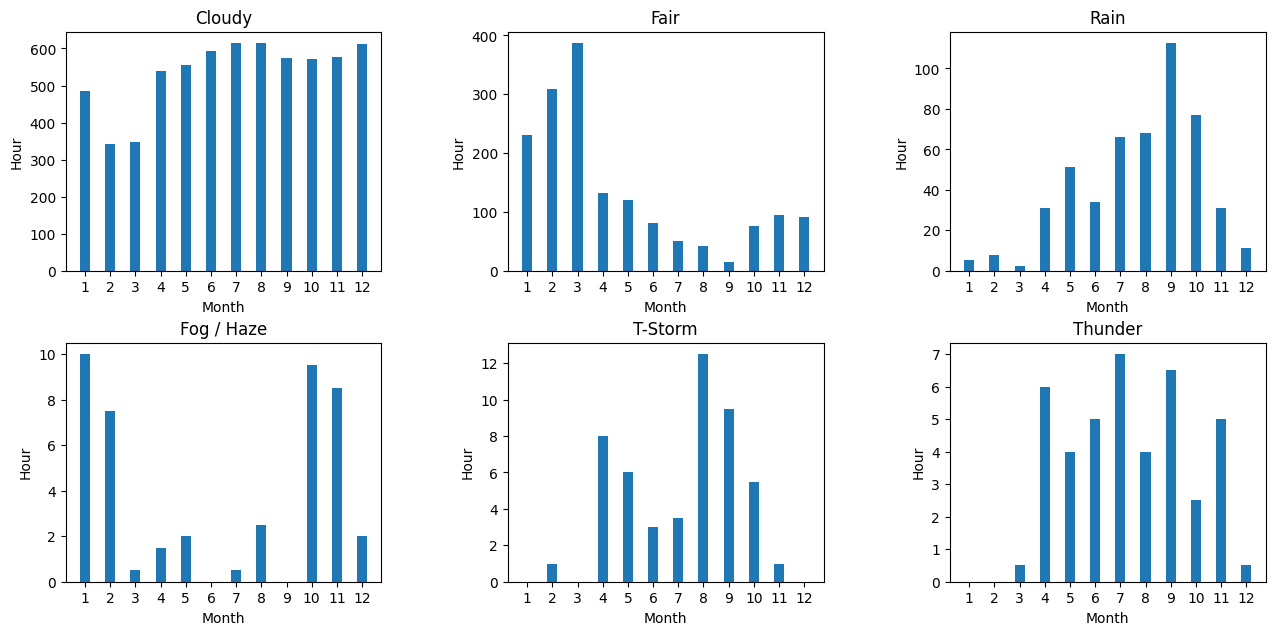

In [188]:
fig, axs = plt.subplots(2, 3,figsize=(15,5))

id = 0
for row in range(0,2):
    for col in range(0,3):
        title = df['Condition'].unique()[id]
        axs[row,col].bar(dict_condition[title].keys(), dict_condition[title].values(),width=0.4)
        axs[row,col].set_xticks((month_list))
        axs[row,col].set_title(title)
        axs[row,col].set_ylabel('Hour')
        axs[row,col].set_xlabel('Month')
        id +=1
plt.subplots_adjust(left=0.1,
                    bottom=-0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.3)

Nhận xét:
- Tổng quát:
    - Điều kiện thời tiết Cloudy (có mấy), Fair (đẹp) và Rain (mưa)  chiếm phần lớn trong năm
    - Các kiểu thời tiết: Fog/Haze (sương mù), T-Storm (giông), và Thunder (sấm sét) xuất hiện ít trong năm với tháng cao nhất chỉ khoảng 13h/tháng 

- Cụ thể:
    - Cloudy:
        - Xuất hiện rất thường xuyên trong năm (trên 300h mỗi tháng), chỉ có tháng 1, 2 và 3 là dưới 500h mỗi tháng, còn lại đều trên 500h
    - Fair:
        - Xuất hiện nhiều vào các tháng đầu năm (tháng 1,2,3) với hơn 200h mỗi tháng, cao điểm nhất là tháng 3 với gần 400h
        - Các tháng còn lại trong năm thời gian xuất hiện ít, dưới 150h/tháng, chạm đáy là tháng 9 (vì lúc này là đỉnh điểm của mùa mưa)
    - Rain:
        - Mưa ít ở các tháng đầu năm và cuối năm (tháng 1,2,3,11,12) với thời gian mưa chỉ dưới 20h/tháng
        - Mưa nhiều bắt đầu từ tháng 7 đến tháng 10 --> mùa mưa bắt đầu, đỉnh điểm là tháng 9 với gần 120h mưa 
    - Fog / Haze:
        - Sương mù nhiều vào các tháng đầu và cuối năm (tháng 1,2,10,11) với thời gian trên 6h/tháng
        - Sương mù xảy ra ít vào các tháng giữa năm (từ tháng 3 đến tháng 9)
    - T-Storm:
        - Mưa giông xảy ra nhiều từ tháng 4 đến tháng 10, nhiều nhất vào tháng 8 và tháng 9, đặc biệt là tháng 8
        --> Nguyên nhân: lúc đó là thời gian bước vào mùa mưa cho nên giông xuất hiện nhiều
    - Thunder:
        - Sấm sét phân bố khá đều ở các tháng giữa và cuối năm (từ tháng 1 đến tháng 11)
        --> Nguyên nhân: Thông thường sấm sét thường đi kèm với mưa giông
        - Xuất hiện ít vào 3 tháng đầu năm (tháng 1,2,3) và tháng 12
        --> Nguyên nhân: vào 3 tháng đầu năm là mùa xuân, thời tiết đẹp nên ít xảy ra sấm sét. Tháng 12 ít sấm sét vì lúc đó đã bắt đầu kết thúc mùa mưa chuyển sang mùa nắng

## Câu hỏi 4

### Nội dung câu hỏi

Sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương điểm sương và độ ẩm 

### Lợi ích khi trả lời câu hỏi

Giúp ta biết được sự tương quan chung giữa 3 chỉ số thời tiết quan trọng: nhiệt độ không khí, nhiệt độ điểm sương và đọ ẩm

### Nguồn cảm hứng của câu hỏi

Nhóm tự nghĩ ra khi khám phá dữ liệu

### Phân tích dữ liệu để trả lời câu hỏi

Ta cần phải tính được nhiệt độ, điểm sương và độ ẩm trung bình mỗi tháng là bao nhiêu

Đầu tiên, ta gom các giá trị lại theo từng tháng bằng `groupby` sau đó dùng `sum()` để tính tổng các giá trị

Tiếp theo, ta đem giá trị vừa tính được chia cho số giá trị của từng tháng. Ta dùng `value_counts()` để đếm tổng số giá trị và dùng `sort_index()` để sắp xếp index lại theo đúng thứ tự của các tháng trong năm

Lưu các giá trị vừa tìm được vào các biến `avg_temperature`, `avg_dew_point`, `avg_humidity` tương ứng với nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm trung bình qua từng tháng

In [91]:
#Nhiệt độ điểm sương trung bình mỗi tháng
avg_dew_point = df['Dew Point'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Độ ẩm trung bình mỗi tháng
avg_humidity = df['Humidity'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Nhiệt độ trung bình mỗi tháng
avg_temperature = df['Temperature'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()

### Vẽ biểu đồ thể hiện sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm 


Dùng bar chart để vẽ giá trị độ ẩm

Dùng line chart để thể hiện nhiệt độ không khí và điểm sương

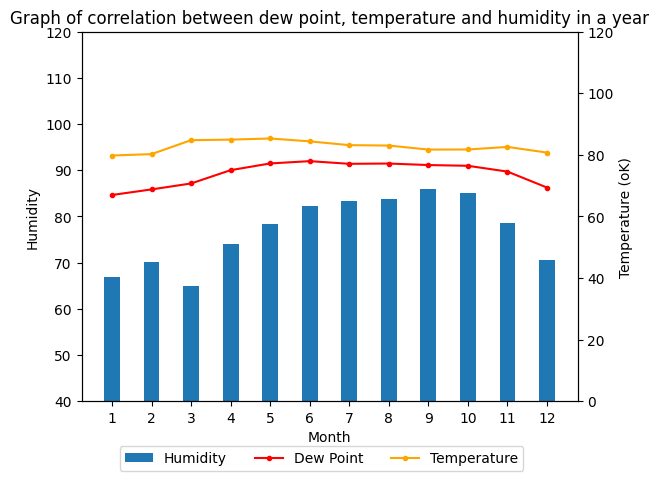

In [104]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.array(month_list), avg_humidity,label='Humidity',width=0.4)
ax1.set_ylabel('Humidity')
ax1.set_xlabel('Month')
ax1.set_ylim(40,120)
ax1.set_xticks((month_list))
ax2 = ax1.twinx()
ax2.plot(month_list, avg_dew_point,color='red', marker='.',label='Dew Point')
ax2.plot(month_list, avg_temperature,color='orange', marker='.',label='Temperature')

ax2.set_ylim(0,120)
plt.title('Graph of correlation between dew point, temperature and humidity in a year')
ax2.set_ylabel('Temperature (oK)')
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05));

Nhận xét:

- Nhiệt độ phân bố tương đối đều giữa các tháng, độ chênh lệch giữa tháng có nhiệt độ cao nhất và tháng có nhiệt độ thấp nhất là rất thấp
- Độ ẩm trong không khí cao, hầu hết các tháng đều có độ ẩm trung bình trên 70% (trừ tháng 1 và tháng 3)
- Nhiệt độ điểm sương gần như là tỉ lệ thuận với nhiệt độ không khí. Khi độ ẩm càng cao thì nhiệt độ điểm sương càng gần với nhiệt độ không khí